In [3]:
# !pip install imblearn

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

In [7]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = '1673873196_hr_comma_sep.xlsx'

# Read the Excel file into a dataframe
data = pd.read_excel(excel_file_path)

data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Missing values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


C:\Users\templ\AppData\Local\Temp\ipykernel_8236\1984222687.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


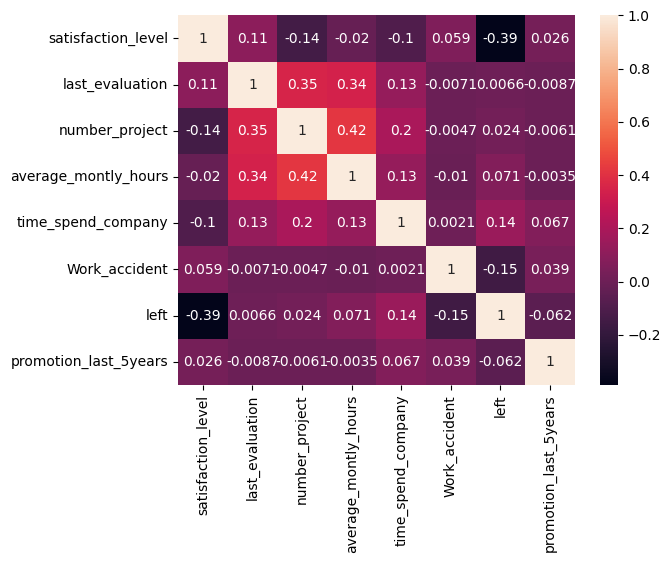

In [8]:
# Task 1: Data quality check
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Task 2.1: Correlation matrix heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

C:\Users\templ\AppData\Local\Temp\ipykernel_8236\2525764262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


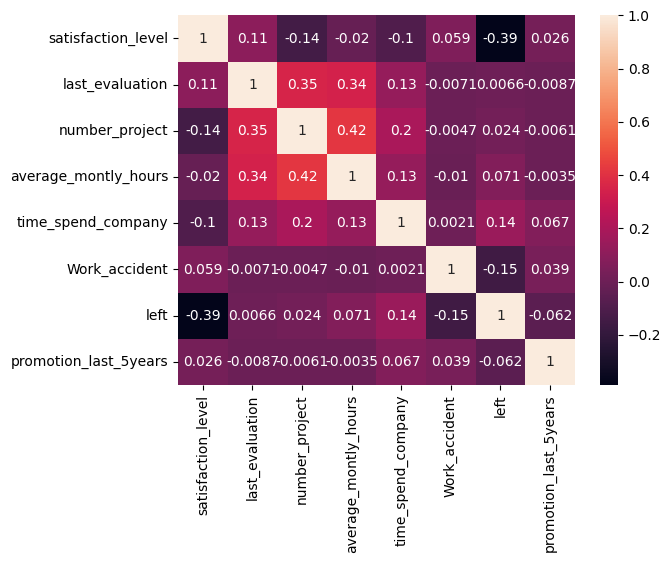

In [10]:
# Task 2.1: Correlation matrix heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

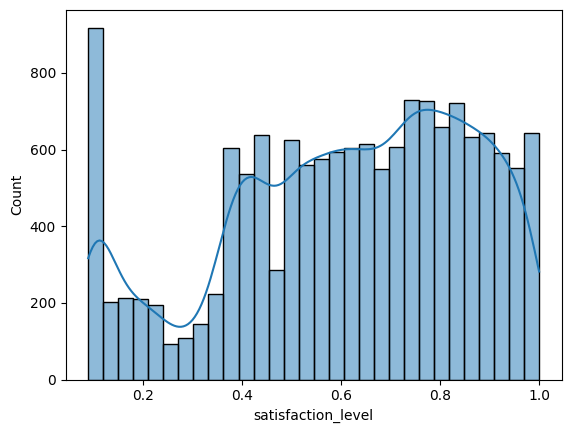

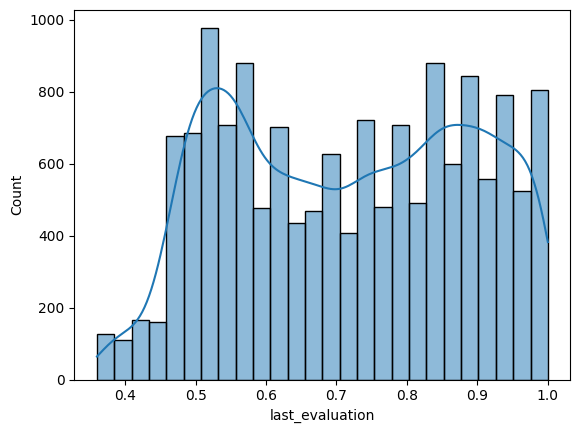

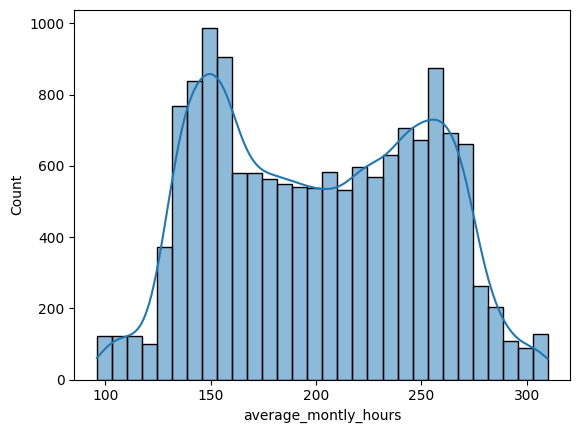

In [11]:
# Task 2.2: Distribution plots
sns.histplot(data['satisfaction_level'], kde=True)
plt.show()

sns.histplot(data['last_evaluation'], kde=True)
plt.show()

sns.histplot(data['average_montly_hours'], kde=True)
plt.show()


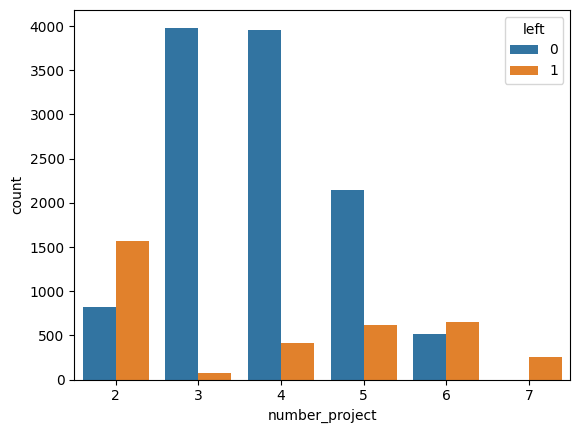

In [12]:
# Task 2.3: Bar plot of Employee Project Count
sns.countplot(data=data, x='number_project', hue='left')
plt.show()

In [13]:
# Task 3.1: Select relevant columns for clustering
clustering_data = data[['satisfaction_level', 'last_evaluation', 'left']]

In [14]:
# Task 3.2: KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(clustering_data.loc[clustering_data['left'] == 1, ['satisfaction_level', 'last_evaluation']])
clustering_data['cluster'] = kmeans.predict(clustering_data[['satisfaction_level', 'last_evaluation']])


C:\Users\templ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\templ\AppData\Local\Temp\ipykernel_8236\1775397828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['cluster'] = kmeans.predict(clustering_data[['satisfaction_level', 'last_evaluation']])


In [15]:
# Task 3.3: Analyze employee clusters
cluster_counts = clustering_data['cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)


Cluster counts:
 1    7955
0    5363
2    1681
Name: cluster, dtype: int64


In [16]:
# Task 4.1: Convert categorical columns to numerical using get_dummies()
categorical_columns = ['sales', 'salary']
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                   'time_spend_company', 'Work_accident', 'promotion_last_5years']

encoded_data = pd.get_dummies(data, columns=categorical_columns)

In [17]:
# Task 4.2: Split dataset into train and test sets
X = encoded_data.drop('left', axis=1)
y = encoded_data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (11999, 20) (11999,)
Test set shape: (3000, 20) (3000,)


In [18]:
# Task 4.3: Upsample the train dataset using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
# Task 5.1: Train a Logistic Regression model with 5-fold cross-validation
logreg = LogisticRegression()
cv_scores_logreg = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5)
print("Logistic Regression CV scores:", cv_scores_logreg)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)
classification_report_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:\n", classification_report_logreg)

C:\Users\templ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\templ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression CV scores: [0.74022423 0.79053869 0.80311731 0.81022696 0.8047046 ]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      2286
           1       0.51      0.79      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.79      3000



C:\Users\templ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Task 5.2: Train a Random Forest Classifier model with 5-fold cross-validation
rf = RandomForestClassifier()
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print("Random Forest CV scores:", cv_scores_rf)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest CV scores: [0.97867104 0.98113208 0.98632759 0.98550725 0.98577681]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [21]:
# Task 5.3: Train a Gradient Boosting Classifier model with 5-fold cross-validation
gb = GradientBoostingClassifier()
cv_scores_gb = cross_val_score(gb, X_train_resampled, y_train_resampled, cv=5)
print("Gradient Boosting CV scores:", cv_scores_gb)
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test)
classification_report_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:\n", classification_report_gb)

Gradient Boosting CV scores: [0.95843588 0.95870932 0.96390484 0.96472518 0.96115974]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



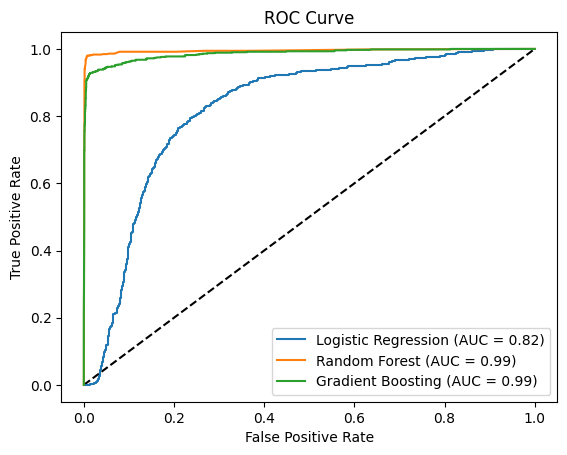

In [26]:
# Task 6.1: Calculate ROC/AUC for each model and plot the ROC curve
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)

roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [23]:
# Task 6.2: Calculate confusion matrix for each model
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print("Confusion Matrix - Logistic Regression:\n", confusion_matrix_logreg)
print("Confusion Matrix - Random Forest:\n", confusion_matrix_rf)
print("Confusion Matrix - Gradient Boosting:\n", confusion_matrix_gb)

Confusion Matrix - Logistic Regression:
 [[1750  536]
 [ 150  564]]
Confusion Matrix - Random Forest:
 [[2267   19]
 [  14  700]]
Confusion Matrix - Gradient Boosting:
 [[2228   58]
 [  48  666]]


In [27]:
# Task 6.3: Determine which metric to use - Recall or Precision
# Based on the confusion matrices, we can determine which metric to prioritize
# If false negatives (predicted left when actually stayed) are more critical, prioritize Recall
# If false positives (predicted stayed when actually left) are more critical, prioritize Precision

# Calculate Recall and Precision for each model
recall_logreg = confusion_matrix_logreg[1, 1] / (confusion_matrix_logreg[1, 0] + confusion_matrix_logreg[1, 1])
recall_rf = confusion_matrix_rf[1, 1] / (confusion_matrix_rf[1, 0] + confusion_matrix_rf[1, 1])
recall_gb = confusion_matrix_gb[1, 1] / (confusion_matrix_gb[1, 0] + confusion_matrix_gb[1, 1])

precision_logreg = confusion_matrix_logreg[1, 1] / (confusion_matrix_logreg[0, 1] + confusion_matrix_logreg[1, 1])
precision_rf = confusion_matrix_rf[1, 1] / (confusion_matrix_rf[0, 1] + confusion_matrix_rf[1, 1])
precision_gb = confusion_matrix_gb[1, 1] / (confusion_matrix_gb[0, 1] + confusion_matrix_gb[1, 1])

print("Recall - Logistic Regression: {:.2f}".format(recall_logreg))
print("Recall - Random Forest: {:.2f}".format(recall_rf))
print("Recall - Gradient Boosting: {:.2f}".format(recall_gb))

print("Precision - Logistic Regression: {:.2f}".format(precision_logreg))
print("Precision - Random Forest: {:.2f}".format(precision_rf))
print("Precision - Gradient Boosting: {:.2f}".format(precision_gb))


Recall - Logistic Regression: 0.79
Recall - Random Forest: 0.98
Recall - Gradient Boosting: 0.93
Precision - Logistic Regression: 0.51
Precision - Random Forest: 0.97
Precision - Gradient Boosting: 0.92
